In [370]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import datetime as dt
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [371]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [372]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [373]:
Base.classes.keys()


['measurement', 'station']

In [374]:
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns("measurement")
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [375]:
columns = inspector.get_columns("station")
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


## D1: Determine the Summary Statistics for June

In [376]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_data = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date)=="06").all()
len(june_data)

1700

In [377]:
#  3. Convert the June temperatures to a list.
june_data_list = []
for x in june_data:
    june_data_list.append(x)
len(june_data_list)

1700

In [378]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_data_df = pd.DataFrame(june_data, columns=['date', 'temperature'])
june_data_df

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [379]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_data_df.describe()


,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


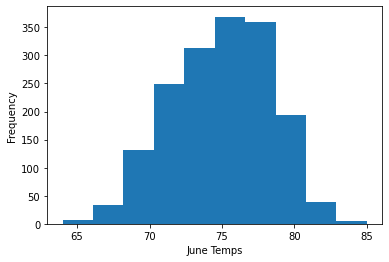

In [380]:
#June Histogram
june_data_df.plot.hist(bins=10, legend=None )
plt.xlabel("June Temps")
plt.show()


## D2: Determine the Summary Statistics for December

In [381]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_data = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date)=="12").all()
len(december_data)

1517

In [382]:
# 7. Convert the December temperatures to a list.
december_data_list = []
for x in december_data:
    december_data_list.append(x)
len(december_data_list)

1517

In [383]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_data_df = pd.DataFrame(december_data_list, columns=['date', 'temperature'])
december_data_df

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [384]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_stats = december_data_df.describe()
dec_stats.rename(columns = {'temperature':"Dec Temps Stats"})

,Dec Temps Stats
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


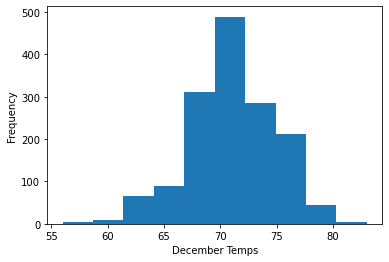

In [385]:
#Decemeber Histogram
december_data_df.plot.hist(bins=10, legend=None )
plt.xlabel("December Temps")
plt.show()

   # EXTRA QUERY- June & December precipitation data

In [496]:
june_prcp = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date)=="06").all()
june_prcp 

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [497]:
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date)=="12").all()
dec_prcp 

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [498]:
# Convert the June precipitation to a list.
june_prcp_list = []
for x in june_prcp :
    june_prcp_list.append(x)
len(june_prcp_list)

1700

In [499]:
# Convert the December precipitation to a list.
dec_prcp_list = []
for x in dec_prcp :
    dec_prcp_list.append(x)
len(dec_prcp_list)

1517

In [501]:
# Create a DataFrame from the JUNE list
june_prcp_df = pd.DataFrame(june_prcp_list)
june_prcp_df

,0,1
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [502]:
# Create a DataFrame from the DECEMBER list
dec_prcp_df = pd.DataFrame(dec_prcp_list)
dec_prcp_df

,0,1
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [504]:
june_prcp_df.describe().rename(columns={1:"June Precipitation Data"})

,June Precipitation Data
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [505]:
dec_prcp_df.describe().rename(columns={1:"December Precipitation Data"})

,December Precipitation Data
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


# Extra Analysis #1 where all  temps are averaged by date for June & Dec 

In [386]:
june_data_2 = june_data_df.sort_values(by=['date'])
june_data_2 

,date,temperature
0,2010-06-01,78.0
472,2010-06-01,73.0
658,2010-06-01,77.0
806,2010-06-01,69.0
844,2010-06-01,76.0
...,...,...
1311,2017-06-30,76.0
235,2017-06-30,75.0
1075,2017-06-30,75.0
471,2017-06-30,74.0


In [387]:
#Average all temps by date
june_data_groupby = june_data_2 .groupby(['date'])['temperature'].mean()
june_data_groupby

date
2010-06-01    73.555556
2010-06-02    74.555556
2010-06-03    74.444444
2010-06-04    72.888889
2010-06-05    76.000000
                ...    
2017-06-26    79.000000
2017-06-27    78.000000
2017-06-28    77.666667
2017-06-29    77.142857
2017-06-30    75.714286
Name: temperature, Length: 240, dtype: float64

In [388]:
june_data_groupby_df = pd.DataFrame(june_data_groupby,  columns=['temperature'] ) 
june_data_groupby_df 

,temperature
date,
2010-06-01,73.555556
2010-06-02,74.555556
2010-06-03,74.444444
2010-06-04,72.888889
2010-06-05,76.000000
...,...
2017-06-26,79.000000
2017-06-27,78.000000
2017-06-28,77.666667


In [507]:
#Get new June Stats
june_stats_2 = june_data_groupby_df.describe()
june_stats_2.rename(columns={"temperature":"June Summary Stats #2"})

,June Summary Stats #2
count,240.000000
mean,75.010911
std,1.812103
min,69.500000
25%,73.857143
50%,75.000000
75%,76.270833
max,79.000000


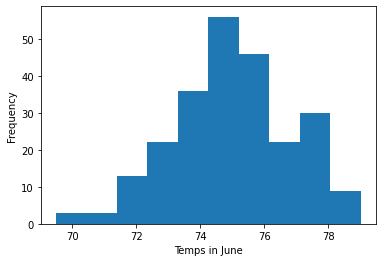

In [390]:
#Plot new histogram to see if results change for JUNE
june_data_groupby_df.plot.hist(bins=10, legend=None )
plt.xlabel("Temps in June")
plt.show()

In [391]:
#Average all temps by date for Dec
dec_data_groupby = december_data_df.groupby(['date'])['temperature'].mean()
dec_data_groupby

date
2010-12-01    73.125000
2010-12-02    72.500000
2010-12-03    71.875000
2010-12-04    74.857143
2010-12-05    71.285714
                ...    
2016-12-27    73.000000
2016-12-28    71.571429
2016-12-29    72.714286
2016-12-30    69.000000
2016-12-31    68.200000
Name: temperature, Length: 217, dtype: float64

In [392]:
dec_data_groupby_df = pd.DataFrame(dec_data_groupby,  columns=['temperature'] ) 
dec_data_groupby_df 

,temperature
date,
2010-12-01,73.125000
2010-12-02,72.500000
2010-12-03,71.875000
2010-12-04,74.857143
2010-12-05,71.285714
...,...
2016-12-27,73.000000
2016-12-28,71.571429
2016-12-29,72.714286


In [506]:
#Get new December Stats
dec_stats_2 = dec_data_groupby_df.describe()
dec_stats_2.rename(columns={"temperature":"December Summary Stats #2"})

,December Summary Stats #2
count,217.000000
mean,71.105334
std,2.485175
min,60.666667
25%,69.750000
50%,71.375000
75%,72.750000
max,76.500000


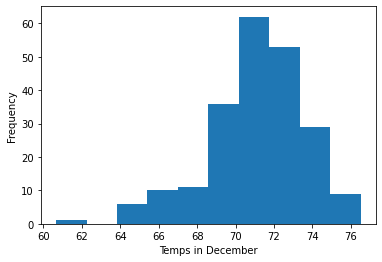

In [394]:
#Plot new histogram to see if results change for DECEMBER
dec_data_groupby_df .plot.hist(bins=10, legend=None )
plt.xlabel("Temps in December")
plt.show()

# Extra Analysis #2 where all temps are averaged by YEAR for June & Dec

In [395]:
#extract year from dataframe before date groupby
june_data_2['June'] = pd.to_datetime(june_data_2['date']).dt.strftime('%Y')
june_data_2

,date,temperature,June
0,2010-06-01,78.0,2010
472,2010-06-01,73.0,2010
658,2010-06-01,77.0,2010
806,2010-06-01,69.0,2010
844,2010-06-01,76.0,2010
...,...,...,...
1311,2017-06-30,76.0,2017
235,2017-06-30,75.0,2017
1075,2017-06-30,75.0,2017
471,2017-06-30,74.0,2017


In [396]:
june_data_3 = june_data_2.drop(['date'], axis=1)
june_data_3

,temperature,June
0,78.0,2010
472,73.0,2010
658,77.0,2010
806,69.0,2010
844,76.0,2010
...,...,...
1311,76.0,2017
235,75.0,2017
1075,75.0,2017
471,74.0,2017


In [397]:
june_data_groupby_2 = june_data_3.groupby(['June'])['temperature'].mean()
june_data_groupby_2

June
2010    74.925620
2011    73.938326
2012    74.000000
2013    74.599078
2014    75.027907
2015    74.990148
2016    75.175258
2017    77.219895
Name: temperature, dtype: float64

In [398]:
#extract year
dec_data_2_df['year in Dec'] = pd.to_datetime(dec_data_2_df['date']).dt.strftime('%Y')
dec_data_2_df

,date,Temperature,year in Dec
0,2010-12-01,76.0,2010
1,2010-12-03,74.0,2010
2,2010-12-04,74.0,2010
3,2010-12-06,64.0,2010
4,2010-12-07,64.0,2010
...,...,...,...
1512,2016-12-27,71.0,2016
1513,2016-12-28,71.0,2016
1514,2016-12-29,69.0,2016
1515,2016-12-30,65.0,2016


In [399]:
dec_data_3_df = dec_data_2_df.drop(['date'], axis=1)
dec_data_3_df 

,Temperature,year in Dec
0,76.0,2010
1,74.0,2010
2,74.0,2010
3,64.0,2010
4,64.0,2010
...,...,...
1512,71.0,2016
1513,71.0,2016
1514,69.0,2016
1515,65.0,2016


In [400]:
dec_data_groupby_2 = dec_data_3_df.groupby(['year in Dec'])['Temperature'].mean()
dec_data_groupby_2

year in Dec
2010    70.208511
2011    70.820628
2012    71.188073
2013    71.094017
2014    69.896861
2015    73.423913
2016    71.130000
Name: Temperature, dtype: float64

In [401]:
dec_new_df = pd.DataFrame(dec_data_groupby_2)
dec_new_df.index.names = ['year']
dec_new_df.rename(columns={'Temperature':"Avg Temp in Dec"}, inplace=True)
dec_new_df 

,Avg Temp in Dec
year,
2010,70.208511
2011,70.820628
2012,71.188073
2013,71.094017
2014,69.896861
2015,73.423913
2016,71.130000


In [402]:
june_new_df = pd.DataFrame(june_data_groupby_2)
june_new_df.index.names = ['year']
june_new_df.rename(columns={'temperature':"Avg Temp in June"}, inplace=True)
june_new_df 

,Avg Temp in June
year,
2010,74.925620
2011,73.938326
2012,74.000000
2013,74.599078
2014,75.027907
2015,74.990148
2016,75.175258
2017,77.219895


In [403]:
#merg June and December by Year
avg_temp_june_dec = pd.merge(june_new_df, dec_new_df, on = "year"  )
avg_temp_june_dec 

,Avg Temp in June,Avg Temp in Dec
year,,
2010,74.925620,70.208511
2011,73.938326,70.820628
2012,74.000000,71.188073
2013,74.599078,71.094017
2014,75.027907,69.896861
2015,74.990148,73.423913
2016,75.175258,71.130000


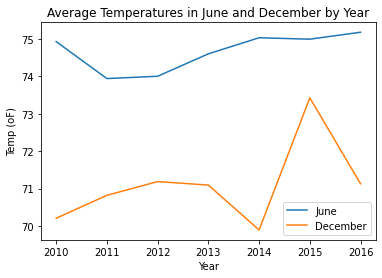

In [404]:
avg_temp_june_dec.plot()
plt.title("Average Temperatures in June and December by Year")
plt.xlabel("Year")
plt.ylabel("Temp (oF)")
plt.legend(labels=['June', 'December'])
plt.show()

# Extra Query to find the Best location by Weather


In [425]:
#Write a query that filters the Measurement table to retrieve the all temperatures and stations FOR JUNE
location_data_JUNE = session.query(Measurement.tobs, Measurement.station).filter(func.strftime("%m", Measurement.date)=="06").all()
location_data_JUNE

[(78.0, 'USC00519397'),
 (76.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (76.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (79.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (82.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (76.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (70.0, 'USC00519397'),
 (76.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (78.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (77.0, 'USC0051

In [426]:
#Convert the data temperatures to a list.
location_data_list_JUNE = []
for x in location_data_JUNE:
    location_data_list_JUNE.append(x)
len(location_data_list_JUNE)

1700

In [462]:
# Create a DataFrame from the list 
location_data_df_JUNE = pd.DataFrame(location_data_JUNE, columns=['temperature', 'station_id'])
location_data_df_JUNE

,temperature,station_id
0,78.0,USC00519397
1,76.0,USC00519397
2,78.0,USC00519397
3,76.0,USC00519397
4,77.0,USC00519397
...,...,...
1695,79.0,USC00516128
1696,74.0,USC00516128
1697,74.0,USC00516128
1698,76.0,USC00516128


In [464]:
#groupby station id
location_groupby_JUNE = location_data_df_JUNE.groupby(['station_id'])['temperature'].mean()
location_groupby_JUNE

station_id
USC00511918    74.139394
USC00513117    74.050847
USC00514830    76.005376
USC00516128    71.937220
USC00517948    76.655405
USC00518838    73.394737
USC00519281    73.271186
USC00519397    77.559322
USC00519523    76.668103
Name: temperature, dtype: float64

In [465]:
#convert to dataframe
location_groupby_df_JUNE = pd.DataFrame(location_groupby_JUNE)
location_groupby_df_JUNE

,temperature
station_id,
USC00511918,74.139394
USC00513117,74.050847
USC00514830,76.005376
USC00516128,71.937220
USC00517948,76.655405
USC00518838,73.394737
USC00519281,73.271186
USC00519397,77.559322
USC00519523,76.668103


In [466]:
location_groupby_df_JUNE.sort_values(by=['temperature'], ascending = False)

,temperature
station_id,
USC00519397,77.559322
USC00519523,76.668103
USC00517948,76.655405
USC00514830,76.005376
USC00511918,74.139394
USC00513117,74.050847
USC00518838,73.394737
USC00519281,73.271186
USC00516128,71.937220


In [467]:
#Write a query that filters the Measurement table to retrieve the all temperatures and stations FOR DECEMBER
location_data_DEC = session.query(Measurement.tobs, Measurement.station).filter(func.strftime("%m", Measurement.date)=="12").all()
location_data_DEC

[(76.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (64.0, 'USC00519397'),
 (64.0, 'USC00519397'),
 (67.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (66.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (68.0, 'USC00519397'),
 (68.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (67.0, 'USC00519397'),
 (66.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (70.0, 'USC00519397'),
 (70.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (75.0, 'USC00519397'),
 (75.0, 'USC00519397'),
 (72.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (68.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (77.0, 'USC00519397'),
 (72.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (70.0, 'USC00519397'),
 (73.0, 'USC0051

In [468]:
#Convert the data temperatures to a list.
location_data_list_DEC = []
for x in location_data_DEC :
    location_data_list_DEC .append(x)
len(location_data_list_DEC)

1517

In [469]:
# Create a DataFrame from the list 
location_data_df_DEC = pd.DataFrame(location_data_list_DEC, columns=['temperature', 'station_id'])
location_data_df_DEC

,temperature,station_id
0,76.0,USC00519397
1,74.0,USC00519397
2,74.0,USC00519397
3,64.0,USC00519397
4,64.0,USC00519397
...,...,...
1512,71.0,USC00516128
1513,71.0,USC00516128
1514,69.0,USC00516128
1515,65.0,USC00516128


In [470]:
#groupby station id
location_groupby_DEC = location_data_df_DEC.groupby(['station_id'])['temperature'].mean()
location_groupby_DEC

station_id
USC00511918    69.684211
USC00513117    71.069444
USC00514830    73.224719
USC00516128    69.291262
USC00517948    71.834862
USC00518838    72.421053
USC00519281    69.903226
USC00519397    71.109524
USC00519523    72.433333
Name: temperature, dtype: float64

In [471]:
location_groupby_DEC_DF = pd.DataFrame(location_groupby_DEC)
location_groupby_DEC_DF

,temperature
station_id,
USC00511918,69.684211
USC00513117,71.069444
USC00514830,73.224719
USC00516128,69.291262
USC00517948,71.834862
USC00518838,72.421053
USC00519281,69.903226
USC00519397,71.109524
USC00519523,72.433333


In [472]:
location_groupby_DEC_DF.sort_values(by=['temperature'], ascending = False)

,temperature
station_id,
USC00514830,73.224719
USC00519523,72.433333
USC00518838,72.421053
USC00517948,71.834862
USC00519397,71.109524
USC00513117,71.069444
USC00519281,69.903226
USC00511918,69.684211
USC00516128,69.291262


In [474]:
location_june_dec = pd.merge(location_groupby_df_JUNE, location_groupby_DEC_DF, on = 'station_id')
location_june_dec

,temperature_x,temperature_y
station_id,,
USC00511918,74.139394,69.684211
USC00513117,74.050847,71.069444
USC00514830,76.005376,73.224719
USC00516128,71.937220,69.291262
USC00517948,76.655405,71.834862
USC00518838,73.394737,72.421053
USC00519281,73.271186,69.903226
USC00519397,77.559322,71.109524
USC00519523,76.668103,72.433333


In [475]:
location_june_dec.rename(columns={'temperature_x':"June Avg Temp", 'temperature_y':"Dec Avg Temp"}, inplace = True)
location_june_dec

,June Avg Temp,Dec Avg Temp
station_id,,
USC00511918,74.139394,69.684211
USC00513117,74.050847,71.069444
USC00514830,76.005376,73.224719
USC00516128,71.937220,69.291262
USC00517948,76.655405,71.834862
USC00518838,73.394737,72.421053
USC00519281,73.271186,69.903226
USC00519397,77.559322,71.109524
USC00519523,76.668103,72.433333


In [476]:
location_june_dec['average'] = location_june_dec.mean(axis=1)
location_june_dec

,June Avg Temp,Dec Avg Temp,average
station_id,,,
USC00511918,74.139394,69.684211,71.911802
USC00513117,74.050847,71.069444,72.560146
USC00514830,76.005376,73.224719,74.615048
USC00516128,71.937220,69.291262,70.614241
USC00517948,76.655405,71.834862,74.245134
USC00518838,73.394737,72.421053,72.907895
USC00519281,73.271186,69.903226,71.587206
USC00519397,77.559322,71.109524,74.334423
USC00519523,76.668103,72.433333,74.550718


In [477]:
location_june_dec.sort_values(by=['average'], ascending = False)

,June Avg Temp,Dec Avg Temp,average
station_id,,,
USC00514830,76.005376,73.224719,74.615048
USC00519523,76.668103,72.433333,74.550718
USC00519397,77.559322,71.109524,74.334423
USC00517948,76.655405,71.834862,74.245134
USC00518838,73.394737,72.421053,72.907895
USC00513117,74.050847,71.069444,72.560146
USC00511918,74.139394,69.684211,71.911802
USC00519281,73.271186,69.903226,71.587206
USC00516128,71.937220,69.291262,70.614241


In [444]:
station_data= session.query(Station.name, Station.station).all()
station_data

[('WAIKIKI 717.2, HI US', 'USC00519397'),
 ('KANEOHE 838.1, HI US', 'USC00513117'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830'),
 ('PEARL CITY, HI US', 'USC00517948'),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523'),
 ('WAIHEE 837.5, HI US', 'USC00519281'),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918'),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128')]